# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [79]:
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns

#### 2. Lee una imagen
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [162]:
image = plt.imread('img/image.png')

Muestra la imagen para ver que se ha cargado bien

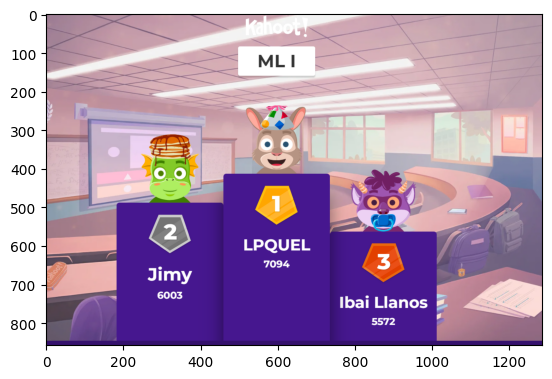

In [82]:
plt.imshow(image);

In [101]:
image.shape

(858, 1286, 4)

In [86]:
image = image.reshape(-1, 4)

In [93]:
image = np.delete(image, 3, 1)

In [96]:
image = image.reshape(858, 1286, 3)

In [99]:
image.shape

(858, 1286, 3)

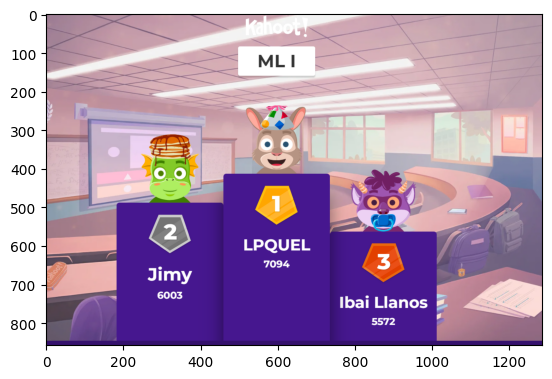

In [98]:
plt.imshow(image);

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [108]:
image = image.reshape(-1, 4)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [109]:
from sklearn.cluster import KMeans

In [110]:
clustering = KMeans(n_clusters= 10, random_state= 42)

In [111]:
clustering.fit(image)

KMeans(n_clusters=10, random_state=42)

In [112]:
clustering.cluster_centers_

array([[0.7479656 , 0.6056352 , 0.65413857, 1.        ],
       [0.26798838, 0.09065843, 0.5450305 , 1.        ],
       [0.9074099 , 0.8393117 , 0.84027004, 1.        ],
       [0.4345532 , 0.3537234 , 0.50089693, 1.        ],
       [0.9724304 , 0.9689565 , 0.9679634 , 1.        ],
       [0.985308  , 0.6810163 , 0.10170937, 1.        ],
       [0.8244245 , 0.29761857, 0.04958284, 1.        ],
       [0.60929394, 0.48416108, 0.5753436 , 1.        ],
       [0.8458179 , 0.69816405, 0.72340393, 1.        ],
       [0.5264272 , 0.78518283, 0.21676117, 1.        ]], dtype=float32)

In [115]:
clustering.labels_

array([7, 7, 7, ..., 1, 1, 1])

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizlos para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [127]:
image_segmentated = clustering.cluster_centers_[clustering.labels_]

In [129]:
image_segmentated.shape

(1103388, 4)

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [130]:
image_segmentated = image_segmentated.reshape((858, 1286, 4))

#### 7. Imprime y guarda en tu ordenador la imagen resultante

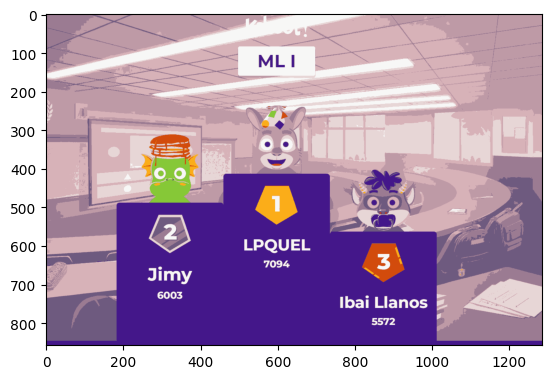

In [134]:
plt.imshow(image_segmentated)
plt.imsave('img/image_segmentated.png', image_segmentated)

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [159]:
image = image.reshape(-1, 4)

In [163]:
image.shape

(858, 1286, 4)

In [161]:
pd.DataFrame(data= image, columns= {'R', 'G', 'B', 'T'})

,G,B,R,T
0,0.596078,0.486275,0.576471,1.0
1,0.596078,0.486275,0.576471,1.0
2,0.596078,0.486275,0.576471,1.0
3,0.596078,0.486275,0.572549,1.0
4,0.596078,0.486275,0.568627,1.0
...,...,...,...,...
1103383,0.207843,0.066667,0.427451,1.0
1103384,0.207843,0.066667,0.427451,1.0
1103385,0.207843,0.066667,0.427451,1.0
1103386,0.207843,0.066667,0.427451,1.0


In [151]:
clustering = KMeans(n_clusters= 10, random_state= 42)

In [156]:
clustering.fit(image.reshape(-1, 4))

KMeans(n_clusters=10, random_state=42)

In [146]:
def image_segmenter(image_path, n_colors, save = False, saving_path = str, image_name = str, extension = str):

    image = plt.imread(image_path)
    original_shape = image.shape
    image = image.reshape(-1, original_shape[2])

    clustering = KMeans(n_clusters= n_colors, random_state= 42)
    clustering.fit(image)
    image_segmentated = clustering.cluster_centers_[clustering.labels_]

    image_segmentated = image_segmentated.reshape(original_shape)

    plt.imshow(image_segmentated)

    if save:
        plt.imsave(f'{saving_path}/{image_name}.{extension}', image_segmentated)

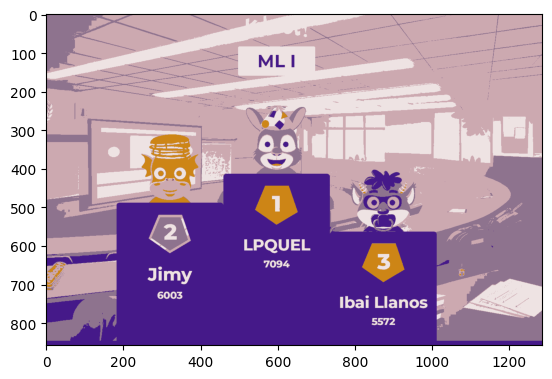

In [148]:
image_segmenter('img/image.png', 5, save= True, saving_path= 'img', image_name= 'saving_segmented', extension= 'png')